In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('historical_over_under_data.csv', index_col = 0)

In [7]:
df.shape

(518, 4)

In [6]:
df.head()

,Team,win_total,actual_wins,result
0,Atlanta Hawks_99-00,46.5,28,U
1,Atlanta Hawks_01-02,36.5,33,U
2,Atlanta Hawks_02-03,41.5,35,U
3,Atlanta Hawks_03-04,33.0,28,U
4,Atlanta Hawks_04-05,27.5,13,U


In [11]:
df['result'].value_counts(normalize = True)

U    0.519305
O    0.478764
P    0.001931
Name: result, dtype: float64

In [37]:
under27 = df.loc[df.win_total < 27].copy()
under27['result'].value_counts(normalize = True)

O    0.604651
U    0.395349
Name: result, dtype: float64

In [35]:
over55 = df.loc[df.win_total > 55].copy()
over55['result'].value_counts(normalize = True)

U    0.627451
O    0.372549
Name: result, dtype: float64

#### For teams who had predicted win totals under 27 or over 55, if you bet overs on the low win totals and unders on the high win totals, you'd have a ~60% success rate.

In [42]:
df['difference'] = df['actual_wins'] - df['win_total'] 
df.head()

,Team,win_total,actual_wins,result,difference
0,Atlanta Hawks_99-00,46.5,28,U,-18.5
1,Atlanta Hawks_01-02,36.5,33,U,-3.5
2,Atlanta Hawks_02-03,41.5,35,U,-6.5
3,Atlanta Hawks_03-04,33.0,28,U,-5.0
4,Atlanta Hawks_04-05,27.5,13,U,-14.5


In [75]:
df['difference'].describe()

# makes sense the avg difference is 0.  Vegas is good at what they do.  

count    518.000000
mean      -0.376448
std        8.327449
min      -31.500000
25%       -6.375000
50%       -0.500000
75%        5.000000
max       27.500000
Name: difference, dtype: float64

<AxesSubplot:>

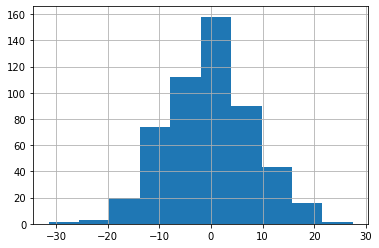

In [53]:
df['difference'].hist()

In [61]:
plus10 = df.loc[(df.difference > 9.5)]
plus10.shape
# 60 of the total 518 teams (11.5%) surpassed their predicted win total by 10 or more games

(60, 5)

In [62]:
minus10 = df.loc[(df.difference < -9.5)]
minus10.shape
# 68 of the total 518 teams (13.1%) came up short of their predicted win total by 10 or more games

(68, 5)

In [65]:
ten_plus = pd.concat([plus10, minus10])

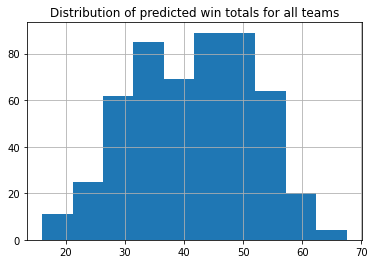

In [74]:
df['win_total'].hist()
plt.title('Distribution of predicted win totals for all teams');

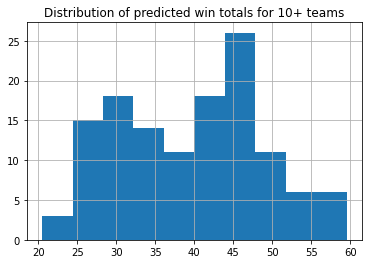

In [73]:
ten_plus['win_total'].hist()
plt.title('Distribution of predicted win totals for 10+ teams');

#### From 2000-2019, 128 of 518 teams (24.7%) differed from their predicted win total by 10 or more games.  

In [76]:
df

,Team,win_total,actual_wins,result,difference
0,Atlanta Hawks_99-00,46.5,28,U,-18.5
1,Atlanta Hawks_01-02,36.5,33,U,-3.5
2,Atlanta Hawks_02-03,41.5,35,U,-6.5
3,Atlanta Hawks_03-04,33.0,28,U,-5.0
4,Atlanta Hawks_04-05,27.5,13,U,-14.5
...,...,...,...,...,...
256,Utah Jazz_14-15,27.0,38,O,11.0
257,Utah Jazz_15-16,42.5,40,U,-2.5
258,Utah Jazz_16-17,47.5,51,O,3.5
259,Utah Jazz_17-18,40.5,48,O,7.5
